In [1]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import torch 
import torch.optim as optim
import pandas as pd
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset,Dataset
from sklearn.model_selection import KFold
import sys
sys.path.append('D:\Desktop\Вся прога на питоне\Задача по курсовой')
from functions import ONP_Adagrad,ONP,to_exel

<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Роман\AppData\Local\Temp\ipykernel_11832\31063005.py:15: SyntaxWarning: invalid escape sequence '\D'
  sys.path.append('D:\Desktop\Вся прога на питоне\Задача по курсовой')


In [2]:
train = pd.read_csv('D:/Desktop/Вся прога на питоне/Задача по курсовой/mtsgrvmgn_trn.csv')
test = pd.read_csv('D:/Desktop/Вся прога на питоне/Задача по курсовой/mtsgrvmgn_tst.csv')
valid = pd.read_csv('D:/Desktop/Вся прога на питоне/Задача по курсовой/mtsgrvmgn_vld.csv')

In [3]:
y_train = train[['H1_8','H2_8','H3_8']]
y_valid = valid[['H1_8','H2_8','H3_8']]
y_test = test[['H1_8','H2_8','H3_8']]
X_test = test.drop(['H1_8', 'H2_8', 'H3_8'], axis=1)
common_columns = X_test.columns.intersection(train.columns)
X_train = train[common_columns]
X_test = X_test[common_columns]
X_valid = valid[common_columns]
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=256,max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Важность признаков
importance = model.feature_importances_
feature_names = X_train.columns

sorted_idx = np.argsort(importance)[::-1]  # Индексы признаков, отсортированные по убыванию важности
sorted_features = feature_names[sorted_idx]  # Имена признаков, отсортированные по убыванию важности
sorted_importance = importance[sorted_idx]  # Важность признаков, отсортированная по убыванию

N = 750

top_n_features = sorted_features[:N]
X_test = test[top_n_features]
common_columns = X_test.columns.intersection(train.columns)
X_train = train[common_columns]
X_test = X_test[common_columns]
X_valid = valid[common_columns]

In [14]:
feature_importance = np.sum(np.abs(importance), axis=0)

In [15]:
feature_importance

1.0

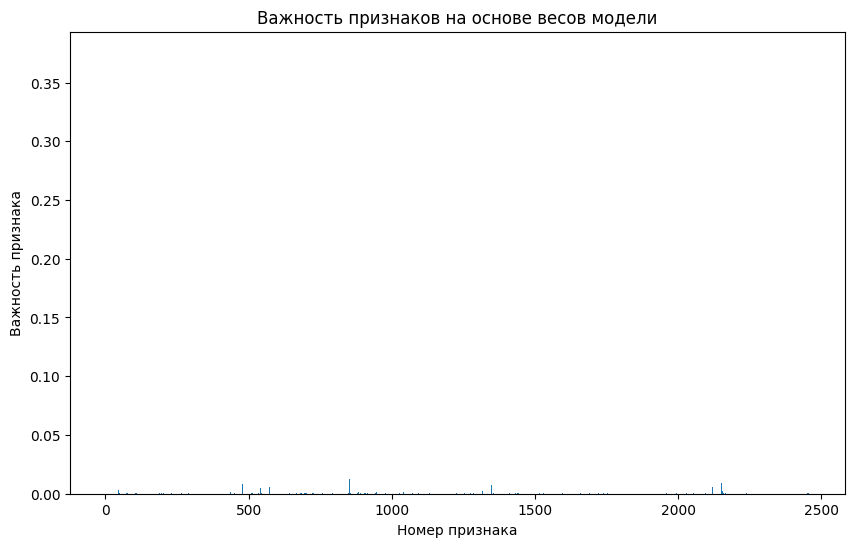

In [20]:

import matplotlib.pyplot as plt
import numpy as np
feature_importance = np.sum(np.abs(importance), axis=0)
plt.figure(figsize=(10, 6))
plt.bar(range(2460), importance)
plt.xlabel("Номер признака")
plt.ylabel("Важность признака")
plt.title("Важность признаков на основе весов модели")
plt.show()

In [4]:
# Фильтр с 3 выходами
to_exel(file_name='GBW_3.xlsx',
        n_coloumns=4,n_iter=3,X_train=X_train,y_train=y_train,
        X_valid=X_valid,y_valid=y_valid,X_test=X_test,y_test=y_test,
        batch_size=64,input_dim=X_train.shape[1],output_dim=3,
        learning_rate=0.001,num_epochs=50,patience=10)

Early stopping triggered at epoch 46


In [5]:
# H1 фильтрованное
y_train = train[['H1_8']]
y_valid = valid[['H1_8']]
y_test = test[['H1_8']]
X_test = test.drop(['H1_8'], axis=1)
common_columns = X_test.columns.intersection(train.columns)
X_train = train[common_columns]
X_test = X_test[common_columns]
X_valid = valid[common_columns]
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=256,max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Важность признаков
importance = model.feature_importances_
feature_names = X_train.columns

sorted_idx = np.argsort(importance)[::-1]  # Индексы признаков, отсортированные по убыванию важности
sorted_features = feature_names[sorted_idx]  # Имена признаков, отсортированные по убыванию важности
sorted_importance = importance[sorted_idx]  # Важность признаков, отсортированная по убыванию

N = 750

top_n_features = sorted_features[:N]
X_test = test[top_n_features]
common_columns = X_test.columns.intersection(train.columns)
X_train = train[common_columns]
X_test = X_test[common_columns]
X_valid = valid[common_columns]

In [6]:
# H1 фильтрованное
to_exel(file_name='GBW_H1.xlsx',
        n_coloumns=4,n_iter=3,X_train=X_train,y_train=y_train,
        X_valid=X_valid,y_valid=y_valid,X_test=X_test,y_test=y_test,
        batch_size=64,input_dim=X_train.shape[1],output_dim=1,
        learning_rate=0.001,num_epochs=50,patience=10)

Early stopping triggered at epoch 48
Early stopping triggered at epoch 40


In [7]:
# H2 Фильтрованное
y_train = train[['H2_8']]
y_valid = valid[['H2_8']]
y_test = test[['H2_8']]
X_test = test.drop(['H2_8'], axis=1)
common_columns = X_test.columns.intersection(train.columns)
X_train = train[common_columns]
X_test = X_test[common_columns]
X_valid = valid[common_columns]
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=256,max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Важность признаков
importance = model.feature_importances_
feature_names = X_train.columns

sorted_idx = np.argsort(importance)[::-1]  # Индексы признаков, отсортированные по убыванию важности
sorted_features = feature_names[sorted_idx]  # Имена признаков, отсортированные по убыванию важности
sorted_importance = importance[sorted_idx]  # Важность признаков, отсортированная по убыванию

N = 750

top_n_features = sorted_features[:N]
X_test = test[top_n_features]
common_columns = X_test.columns.intersection(train.columns)
X_train = train[common_columns]
X_test = X_test[common_columns]
X_valid = valid[common_columns]

In [8]:
# H2 Фильтрованное
to_exel(file_name='GBW_H2.xlsx',
        n_coloumns=4,n_iter=3,X_train=X_train,y_train=y_train,
        X_valid=X_valid,y_valid=y_valid,X_test=X_test,y_test=y_test,
        batch_size=64,input_dim=X_train.shape[1],output_dim=1,
        learning_rate=0.001,num_epochs=50,patience=10)

Early stopping triggered at epoch 49


In [9]:
# H3 Фильтрованное
y_train = train[['H3_8']]
y_valid = valid[['H3_8']]
y_test = test[['H3_8']]
X_test = test.drop(['H3_8'], axis=1)
common_columns = X_test.columns.intersection(train.columns)
X_train = train[common_columns]
X_test = X_test[common_columns]
X_valid = valid[common_columns]
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=256,max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Важность признаков
importance = model.feature_importances_
feature_names = X_train.columns

sorted_idx = np.argsort(importance)[::-1]  # Индексы признаков, отсортированные по убыванию важности
sorted_features = feature_names[sorted_idx]  # Имена признаков, отсортированные по убыванию важности
sorted_importance = importance[sorted_idx]  # Важность признаков, отсортированная по убыванию

N = 750

top_n_features = sorted_features[:N]
X_test = test[top_n_features]
common_columns = X_test.columns.intersection(train.columns)
X_train = train[common_columns]
X_test = X_test[common_columns]
X_valid = valid[common_columns]

In [10]:
# H3 Фильтрованное
to_exel(file_name='GBW_H3.xlsx',
        n_coloumns=4,n_iter=3,X_train=X_train,y_train=y_train,
        X_valid=X_valid,y_valid=y_valid,X_test=X_test,y_test=y_test,
        batch_size=64,input_dim=X_train.shape[1],output_dim=1,
        learning_rate=0.001,num_epochs=50,patience=10)